In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.065146615249012


-----



auc: 0.7072841483523911
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.060220762456871


-----



auc: 0.6941238238621212
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.025207490330644


-----



auc: 0.6981138426479919
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.044094649827627


-----



auc: 0.7093484438339192
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.0455812556154411


-----



auc: 0.709915611814346
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.045252247043589


-----



auc: 0.7166928442350238
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.0

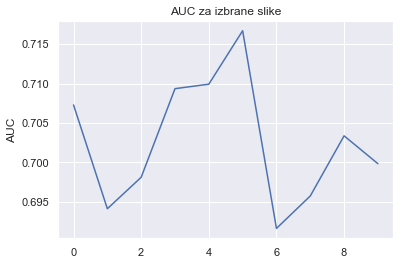

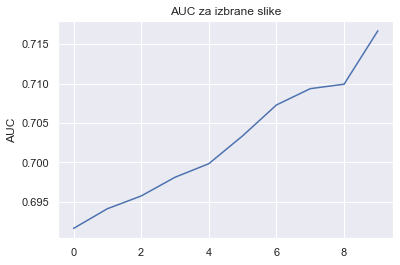

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.7091050854208262

rmse: 1.033167620743515


-----



auc: 0.7091050854208262

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.7168755611042532

rmse: 1.0055629643956214


-----



auc: 0.7168755611042532

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.9653214656579143
-
-
2162
0.9958544431963198
-
-
2162
1.0
-
-
2162
1.0
-
Object selection: knn

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.724934508216242

rmse: 1.0383405240992316


-----



auc: 0.724934508216242

Preselection

(3000, 2048)
-
2249
0.7496666666666666
-
-
2171
0.96532

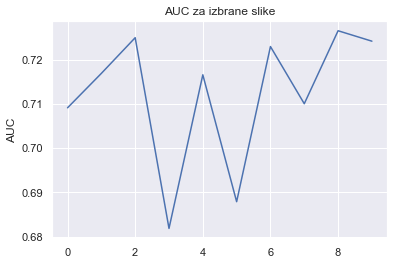

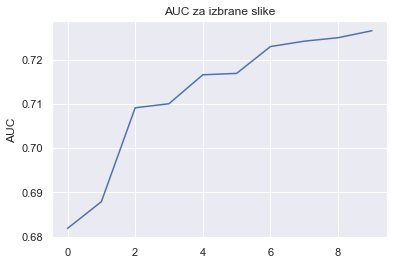

In [3]:
# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-knn.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2210
0.7366666666666667
-
-
2172
0.9828058324975911
-
-
2166
0.9972375690607734
-
-
2164
0.9990766389658358
-
-
2161
0.9986130374479889
-
Object selection: rf

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.0630499109443179


-----



auc: 0.6966366256647587

Preselection

(3000, 2048)
-
2209
0.7363333333333334
-
-
2163
0.9791777279609856
-
-
2156
0.9967637540453075
-
-
2153
0.9986085337238478
-
-
2147
0.9972125422003629
-
-
1247
0.5805400372439479
-
-
700
0.5586669420444506
-
-
526
0.705126959450706
-
-
494
0.7577192463253427
-
-
464
0.7424625812783708
-
Object selection: rf

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.0315016066960172


-----



auc: 0.7084049473454213

Preselection

(3000, 2048)
-
2221
0.7403333333333334
-
-
2173
0.9783905362852732
-
-
2168
0.9976992443005016
-
-
2163
0.9976947902259106
-
Object selection: rf

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

rmse: 1.

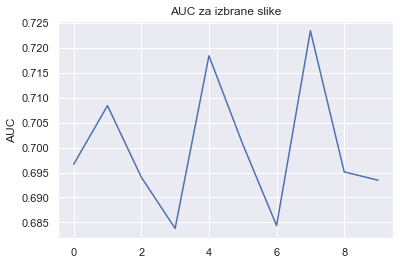

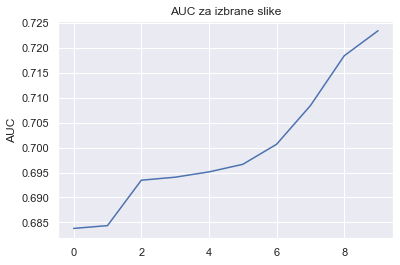

In [4]:
# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle
import matplotlib.pyplot as plt

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 7]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-r-2-n-8-2-b.csv'
save_scores(scores, results_file)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Object selection: random

Dfmf

auc: 0.7169004049026795
Object selection: random

Dfmf

auc: 0.7246174230101929
Object selection: random

Dfmf

auc: 0.7132143669328997
Object selection: random

Dfmf

auc: 0.7235311205479407
Object selection: random

Dfmf

auc: 0.7035692307692307
Object selection: random

Dfmf

auc: 0.7403294844475838
Object selection: random

Dfmf

auc: 0.7193543002136752
Object selection: random

Dfmf

auc: 0.7038266030102992
Object selection: random

Dfmf

auc: 0.7076454282336635
Object selection: random

Dfmf

auc: 0.7305732634223385
